In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

## 데이터 전처리

### 폴더 생성

In [3]:
import os, shutil

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/clothes_style'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_casual_dir = os.path.join(train_dir, 'casual')
os.mkdir(train_casual_dir)

# 훈련용 강아지 사진 디렉터리
train_feminine_dir = os.path.join(train_dir, 'feminine')
os.mkdir(train_feminine_dir)

# 훈련용 강아지 사진 디렉터리
train_formal_dir = os.path.join(train_dir, 'formal')
os.mkdir(train_formal_dir)


# 검증용 고양이 사진 디렉터리
validation_casual_dir = os.path.join(validation_dir, 'casual')
os.mkdir(validation_casual_dir)

# 검증용 강아지 사진 디렉터리
validation_feminine_dir = os.path.join(validation_dir, 'feminine')
os.mkdir(validation_feminine_dir)

# 검증용 강아지 사진 디렉터리
validation_formal_dir = os.path.join(validation_dir, 'formal')
os.mkdir(validation_formal_dir)


# 테스트용 고양이 사진 디렉터리
test_casual_dir = os.path.join(test_dir, 'casual')
os.mkdir(test_casual_dir)

# 테스트용 강아지 사진 디렉터리
test_feminine_dir = os.path.join(test_dir, 'feminine')
os.mkdir(test_feminine_dir)

# 테스트용 강아지 사진 디렉터리
test_formal_dir = os.path.join(test_dir, 'formal')
os.mkdir(test_formal_dir)


### 폴더에 이미지 저장

In [4]:
import glob
import os
casual_file=[]

for filename in glob.glob('./img/dataset/casual/*.jpg'): #assuming gif
    casual_file.append(filename)

# 처음 400개의 캐쥬얼룩 이미지를 train_cats_dir에 복사합니다
fnames = ['casual.{}.jpg'.format(i) for i in range(400)]
for i, fname in enumerate(fnames):
    dst = os.path.join(train_casual_dir, fname)
    shutil.copyfile(casual_file[i], dst)
    

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['casual.{}.jpg'.format(i) for i in range(400, 550)]
for i, fname in enumerate(fnames):
    dst = os.path.join(validation_casual_dir, fname)
    shutil.copyfile(casual_file[i+200], dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['casual.{}.jpg'.format(i) for i in range(550, 700)]
for i, fname in enumerate(fnames):
   
    dst = os.path.join(test_casual_dir, fname)
    shutil.copyfile(casual_file[i+300], dst)


In [8]:
import glob

feminine_file=[]

for filename in glob.glob('./img/dataset/feminine/*.jpg'): #assuming gif
    feminine_file.append(filename)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['feminine.{}.jpg'.format(i) for i in range(400)]
for i, fname in enumerate(fnames):
    dst = os.path.join(train_feminine_dir, fname)
    shutil.copyfile(feminine_file[i], dst)
    

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['feminine.{}.jpg'.format(i) for i in range(400, 550)]
for i, fname in enumerate(fnames):
    dst = os.path.join(validation_feminine_dir, fname)
    shutil.copyfile(feminine_file[i+200], dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['feminine.{}.jpg'.format(i) for i in range(550, 700)]
for i, fname in enumerate(fnames):
   
    dst = os.path.join(test_feminine_dir, fname)
    shutil.copyfile(feminine_file[i+300], dst)


In [9]:
import glob

formal_file=[]

for filename in glob.glob('./img/dataset/formal/*.jpg'): #assuming gif
    formal_file.append(filename)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['formal.{}.jpg'.format(i) for i in range(400)]
for i, fname in enumerate(fnames):
    dst = os.path.join(train_formal_dir, fname)
    shutil.copyfile(formal_file[i], dst)
    

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['formal.{}.jpg'.format(i) for i in range(400, 550)]
for i, fname in enumerate(fnames):
    dst = os.path.join(validation_formal_dir, fname)
    shutil.copyfile(formal_file[i+200], dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['formal.{}.jpg'.format(i) for i in range(550, 700)]
for i, fname in enumerate(fnames):
   
    dst = os.path.join(test_formal_dir, fname)
    shutil.copyfile(formal_file[i+300], dst)


In [10]:
print('훈련용 feminine 이미지 전체 개수:', len(os.listdir(train_feminine_dir)))

훈련용 feminine 이미지 전체 개수: 400


In [11]:
print('검증용 feminine 이미지 전체 개수:', len(os.listdir(validation_feminine_dir)))

검증용 feminine 이미지 전체 개수: 150


In [12]:
print('테스트용 formal 이미지 전체 개수:', len(os.listdir(test_formal_dir)))

테스트용 formal 이미지 전체 개수: 150


## CNN모델 학습

In [14]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [16]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [17]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Using TensorFlow backend.


Found 1200 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


In [18]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20, 3)


In [19]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=60,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=20)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 60 steps, validate for 20 steps
Epoch 1/20
60/60 [==============================] - 33s 549ms/step - loss: 0.6341 - acc: 0.6628 - val_loss: 0.6232 - val_acc: 0.6758
Epoch 2/20
60/60 [==============================] - 32s 540ms/step - loss: 0.6070 - acc: 0.6786 - val_loss: 0.5886 - val_acc: 0.6900
Epoch 3/20
60/60 [==============================] - 33s 547ms/step - loss: 0.5802 - acc: 0.6972 - val_loss: 0.5737 - val_acc: 0.7017
Epoch 4/20
60/60 [==============================] - 31s 514ms/step - loss: 0.5691 - acc: 0.7047 - val_loss: 0.5658 - val_acc: 0.7042
Epoch 5/20
60/60 [==============================] - 31s 511ms/step - loss: 0.5480 - acc: 0.7175 - val_loss: 0.5325 - val_acc: 0.7300
Epoch 6/20
60/60 [==============================] - 31s 522ms/step - loss: 0.5290 - acc: 0.7314 - val_loss: 0.5031 - val_acc: 0.7558
Epoch 7/20
60/60 [================

In [20]:
model.save('clothes_style_basic.h5')

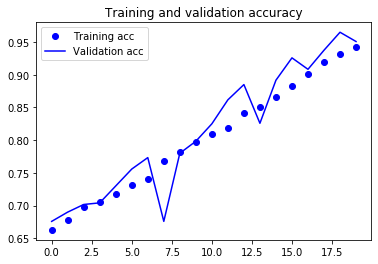

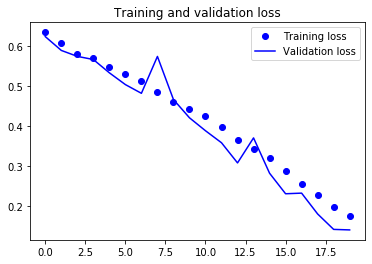

In [22]:
####################모델 정확도
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
#####################테스트 결과 정확성

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

Found 450 images belonging to 3 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
test acc: 0.8633333


## VGG 16 모델로 학습

In [26]:
########################### VGG16모델 (훈련된 컨벌루션 신경망)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.applications import VGG16
 

transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
transfer_model.trainable=False

model_tr = models.Sequential([
    transfer_model, 
    Flatten(), 
    Dense(512, activation='relu'),
    Dense(3,activation='softmax')
    #Dense(1, 'sigmoid') 정확도 0.75.
])

model_tr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

transfer_history = model_tr.fit_generator(
    train_generator,
    steps_per_epoch=60,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=20)
                            

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 60 steps, validate for 20 steps
Epoch 1/10
60/60 [==============================] - 113s 2s/step - loss: 0.7536 - accuracy: 0.6997 - val_loss: 0.4074 - val_accuracy: 0.8192
Epoch 2/10
60/60 [==============================] - 117s 2s/step - loss: 0.4140 - accuracy: 0.8139 - val_loss: 0.3045 - val_accuracy: 0.8750
Epoch 3/10
60/60 [==============================] - 115s 2s/step - loss: 0.3222 - accuracy: 0.8586 - val_loss: 0.2482 - val_accuracy: 0.8992
Epoch 4/10
60/60 [==============================] - 118s 2s/step - loss: 0.2331 - accuracy: 0.9019 - val_loss: 0.1809 - val_accuracy: 0.9325
Epoch 5/10
60/60 [==============================] - 116s 2s/step - loss: 0.2036 - accuracy: 0.9219 - val_loss: 0.1008 - val_accuracy: 0.9767
Epoch 6/10
60/60 [==============================] - 119s 2s/step - loss: 0.1074 - accuracy: 0.9683 - val_loss: 0.0665 - val_accuracy: 0.9908
Epoch 7/10
60/60 [==============================] - 118s 2s/st

In [30]:
model_tr.save('clothes_style_vgg.h5')

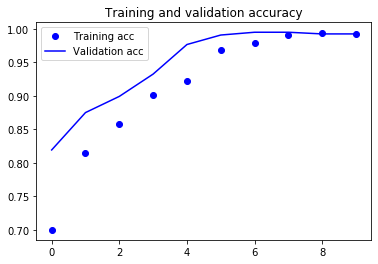

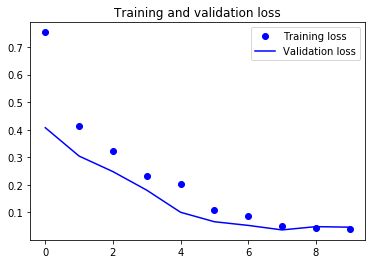

In [28]:
####################모델 정확도
import matplotlib.pyplot as plt

acc = transfer_history.history['accuracy']
val_acc = transfer_history.history['val_accuracy']
loss = transfer_history.history['loss']
val_loss = transfer_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
#####################테스트 결과 정확성

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model_tr.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

Found 450 images belonging to 3 classes.
  ...
    to  
  ['...']
test acc: 0.9175


In [97]:
model_json = model.to_json()
with open("model.json", "w") as json_file : 
    json_file.write(model_json)

In [98]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


./img/test/f0246b7a4d00ba6ca0b5080bdd63f7be.jpg : , Predict : formal
./img/test/f111fed3b4f5b05d45f49f3c0a630eba.jpg : , Predict : casual
./img/test/f119de2f1d2dce84c8dbf16d4b4d39f7.jpg : , Predict : formal


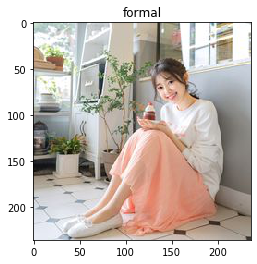

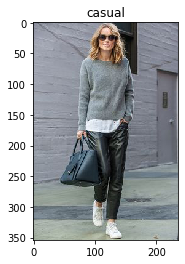

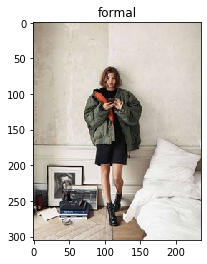

In [42]:
###########################예측 값
import os, re, glob

import cv2

import numpy as np

import shutil

from numpy import argmax

from tensorflow.keras.models import load_model
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
from PIL import Image

categories = ["casual","feminine","formal"]

 

def Dataization(img_path):
    
    
    image_w = 150

    image_h = 150

    img = mpimg.imread(img_path)

    img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])

    return (img/256)

 




test = []

images=['./img/test/f0246b7a4d00ba6ca0b5080bdd63f7be.jpg','./img/test/f111fed3b4f5b05d45f49f3c0a630eba.jpg','./img/test/f119de2f1d2dce84c8dbf16d4b4d39f7.jpg']


#convertSize(image_dir,image_dir+'resize/')

for file in images:

    if (file.find('.jpg') is not -1):       

        #src.append(image_dir + file)

        #name.append(file)

        test.append(Dataization(file))

 

test = np.array(test)

#test = img_to_array(test)

model = load_model('clothes_style_vgg.h5')

predict = model.predict_classes(test)

 

for i in range(len(test)):
    #print(predict[i])
    im=Image.open(images[i])
    plt.figure()
    plt.title(str(categories[predict[i]]))
    plt.imshow(im)
    print(images[i] + " : , Predict : "+ str(categories[predict[i]]))


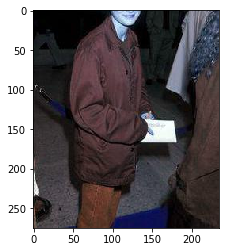

In [1]:
import cv2
im = cv2.imread('./img/casualBodyOnly/884.jpg') #사진 읽어들이기

#이미지 출력
import matplotlib.pyplot as plt
plt.imshow(im)
plt.show()

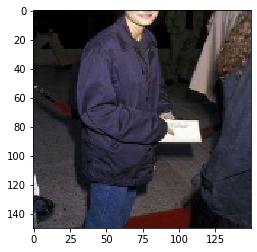

In [166]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) #색공간 변환
im = cv2.resize(im, (150,150)) #사이즈 조정

#이미지 출력
import matplotlib.pyplot as plt
plt.imshow(im)
plt.show()

In [167]:
import numpy as np
im = im.reshape(-1,150*150*3)/ 255
im

array([[0.00392157, 0.01176471, 0.00784314, ..., 0.11764706, 0.13333333,
        0.16862745]])

In [168]:
from keras.models import model_from_json 
import tensorflow as tf
json_file = open("./model.json", "r")
loaded_model_json = json_file.read() 
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)

In [169]:
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [170]:
loaded_model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=['accuracy'])


In [171]:
r = loaded_model.predict(im, batch_size=32, verbose=1)
r
res = r[0]

1/1 [==============================] - 0s 47ms/sample


In [172]:
r

array([[0.2809919 , 0.33399168, 0.38501644]], dtype=float32)

In [173]:
labels=['casual','femi','formal']
for i, acc in enumerate(res) :
    print(labels[i], "=", int(acc*100))
print("---")
print("예측한 결과 = " , labels[res.argmax()])

casual = 28
femi = 33
formal = 38
---
예측한 결과 =  formal


In [ ]:
import cv2
im = cv2.imread('./img/casualBodyOnly/884.jpg') #사진 읽어들이기
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) #색공간 변환
im = cv2.resize(im, (150,150)) #사이즈 조정

#이미지 출력
import matplotlib.pyplot as plt
plt.imshow(im)
plt.show()

In [ ]:
import numpy as np
im = im.reshape(-1,150*150*3)/ 255
im

ValueError: Error when checking input: expected vgg16_input to have 4 dimensions, but got array with shape (1, 67500)

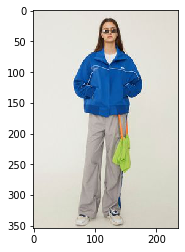

In [36]:
###########################예측 값
import os, re, glob

import cv2

import numpy as np

import shutil

from numpy import argmax

from tensorflow.keras.models import load_model
import matplotlib.image as mpimg

from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

categories = ["casual","feminine","formal"]

image_path = "./img/casual/e5781051c85f29bca49a580eb77caf73.jpg"

#이미지 보여주고 사이즈
def Dataization(img_path):
    
    
    image_w = 150

    image_h = 150

    img = mpimg.imread(img_path)
    
    plt.imshow(img)

    img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])

    return (img/256)

 

#src = []

#name = []

image=Dataization(image_path)



#convertSize(image_dir,image_dir+'resize/')

#for image_path in images:

#
#        test.append(Dataization(image_path))

 

image = np.array(image)
import numpy as np
image = image.reshape(-1,150*150*3)/ 255

#test = img_to_array(test)

model = load_model('clothes_style_vgg.h5')

predict = model.predict_classes(image)
print(image_path + " : , Predict : "+ str(categories[predict]))
 

#for i in range(len(test)):
#    print(predict[i])
    #print(name[i] + " : , Predict : "+ str(categories[predict[i]]))
